In [1]:
#Read wide table from one drive
widecsv=read.csv("ED fig.4d.csv", sep=",")
## change the name also in export file
#rotate from wide table to tall table
tallcsv <- stack(widecsv)

#change column name
names(tallcsv)[1] <- ("VALUE")
names(tallcsv)[2] <- ("Treatment")

#add new column for Trial
tallcsv$Trial <- "One"

#change different trial using each n of each trial
## Trial "One" max n: 6 // Trial "Two" max n: 6
### you can modify this "for loop" using rest of dividing 
for(i in 1:nrow(tallcsv))
  if(i%%14< 8 & i%%14 > 0){
    tallcsv[i,3] <- "One"
  } 
for(i in 1:nrow(tallcsv))
  if(i%%14 >= 8 | i%%14 == 0){
    tallcsv[i,3] <- "Two"
  } 
print(tallcsv)

#delete NA row
tallcsv2 <- tallcsv[!is.na(tallcsv$VALUE),]
#change column location
tallcsv3 <- data.frame(tallcsv2[2],tallcsv2[1],tallcsv2[3])

#export
write.csv(tallcsv3,"ED fig.4d_tall.csv", row.names = FALSE)



          VALUE Treatment Trial
1  1.119498e+04  X01.DMSO   One
2  6.954144e+03  X01.DMSO   One
3  1.093579e+04  X01.DMSO   One
4  3.670031e+03  X01.DMSO   One
5  2.985135e+04  X01.DMSO   One
6            NA  X01.DMSO   One
7            NA  X01.DMSO   One
8  5.263851e+03  X01.DMSO   Two
9  1.039483e+03  X01.DMSO   Two
10 4.010882e+04  X01.DMSO   Two
11 7.006485e+04  X01.DMSO   Two
12 1.653603e+04  X01.DMSO   Two
13 4.329275e+02  X01.DMSO   Two
14           NA  X01.DMSO   Two
15 2.277612e+03 X02.flg20   One
16 1.930139e+03 X02.flg20   One
17 1.080838e+05 X02.flg20   One
18 5.346566e+03 X02.flg20   One
19           NA X02.flg20   One
20           NA X02.flg20   One
21           NA X02.flg20   One
22 3.016276e+04 X02.flg20   Two
23 4.753688e+03 X02.flg20   Two
24 8.425181e+04 X02.flg20   Two
25 5.702282e+03 X02.flg20   Two
26           NA X02.flg20   Two
27           NA X02.flg20   Two
28           NA X02.flg20   Two
29 2.799824e+04 X03.FIC04   One
30 5.532647e+04 X03.FIC04   One
31 3.499

In [3]:
#load the required packages
library(car)
library(MASS)
library(stats)
library(sjPlot)
library(tidyverse)
library(lme4)
library(lmerTest)
library(LMERConvenienceFunctions)
library(multcomp)

In [4]:
#VALUEdata=read.csv(choose.files())
VALUEdata=read.csv("ED fig.4d_tall.csv", sep=",")
VALUEdata$VALUE <- as.numeric(as.character(VALUEdata$VALUE))

print(head(VALUEdata))

  Treatment     VALUE Trial
1  X01.DMSO 11194.980   One
2  X01.DMSO  6954.144   One
3  X01.DMSO 10935.790   One
4  X01.DMSO  3670.031   One
5  X01.DMSO 29851.350   One
6  X01.DMSO  5263.851   Two


[1] 45 44

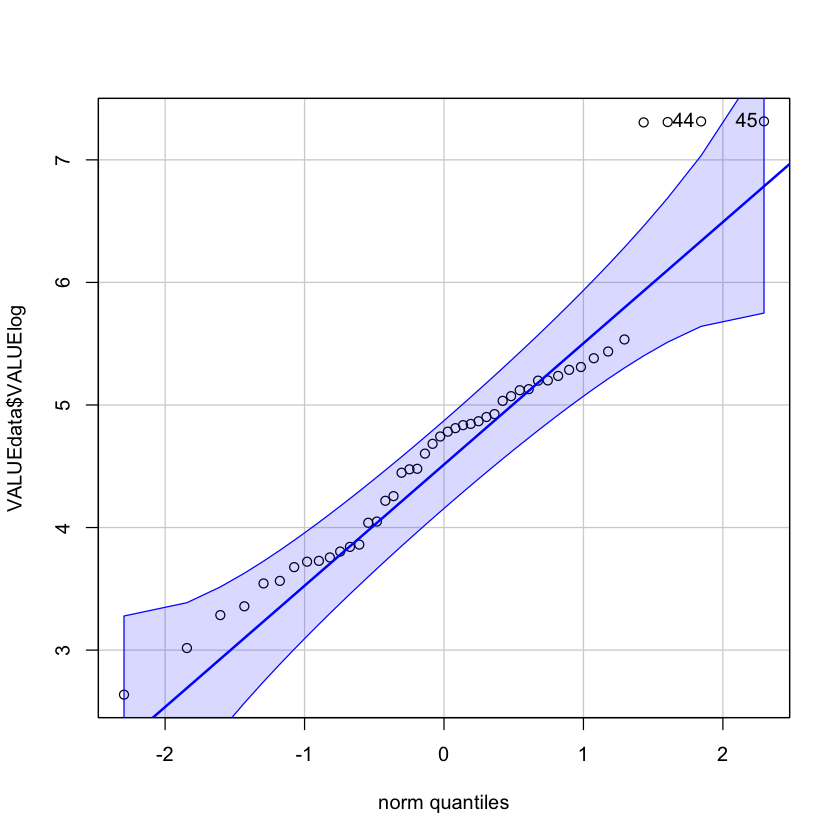

In [5]:
#Normal distribution and log converted
VALUEdata$VALUElog <- log10(VALUEdata$VALUE)
qqp(VALUEdata$VALUElog, "norm")

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

Warning message:
“Model was not fitted by REML. Re-fitting model using REML, but p-values, df, etc. still might be unreliable.”


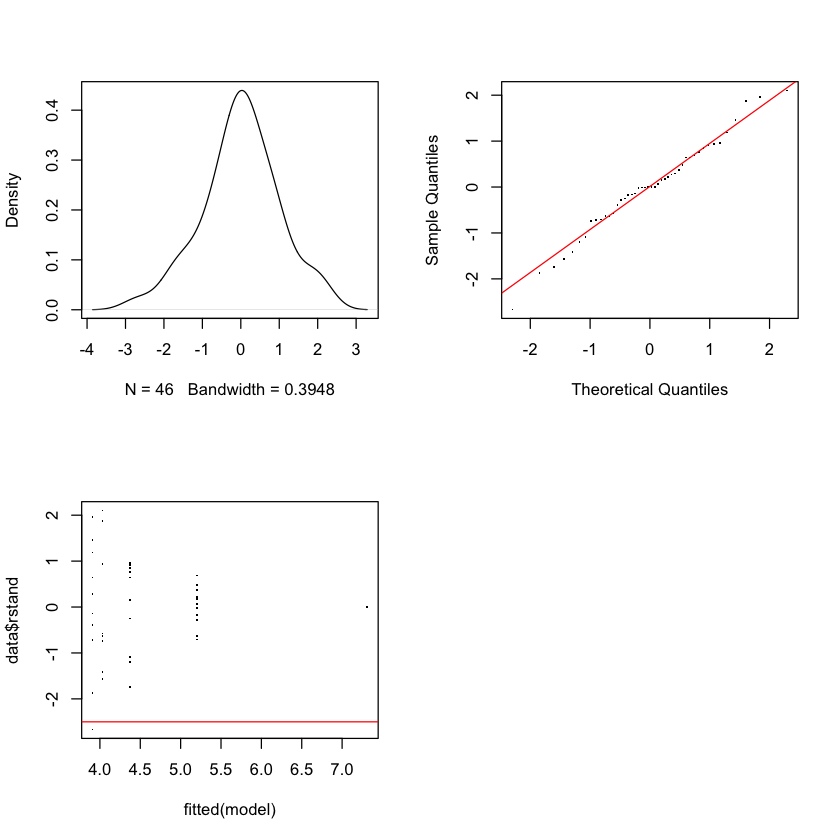

In [6]:
#set REML to FALSE if the data is normal, so we can use the maximum likelihood because the data are normal, we have similar sample sizes between effects, and we only have one random effect
VALUElog.lmm<-lmer(VALUElog ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
m<-lmer(VALUElog ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
tab_model(m, p.val = "kr", show.df = TRUE)
#the density plot should look roughly normal, centered on 0. In the quantile plot the black dots should roughly mirror the red line. And in the fitted residual plot most black dots should be between the red lines, with no obvious skew from left to right.
mcp.fnc(VALUElog.lmm)

In [7]:
#If the above looks good, then we can get the model characteristics
summary(VALUElog.lmm)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: VALUElog ~ Treatment + (1 | Trial)
   Data: VALUEdata

     AIC      BIC   logLik deviance df.resid 
    75.4     88.2    -30.7     61.4       39 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.69950 -0.62588  0.00122  0.65237  2.12655 

Random effects:
 Groups   Name        Variance Std.Dev.
 Trial    (Intercept) 0.0000   0.0000  
 Residual             0.2226   0.4718  
Number of obs: 46, groups:  Trial, 2

Fixed effects:
                   Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)          3.9101     0.1423 46.0000  27.485  < 2e-16 ***
TreatmentX02.flg20   0.1202     0.2192 46.0000   0.548   0.5860    
TreatmentX03.FIC04   0.4666     0.2062 46.0000   2.263   0.0284 *  
TreatmentX04.Maya2   1.2957     0.1933 46.0000   6.703 2.54e-08 ***
TreatmentX05.flg22   3.4004     0.2755 46.0000  12.343 3.35e-16 ***
---
Signif. codes:  0 ‘***’ 0.00

In [8]:
#anova analysis of lmm
aov <- anova(m)
print(summary(aov))
#Tukey's post-hoc, load library multcomp
tukey_result <- glht(m, linfct = mcp(Treatment = "Tukey"))
multcomps <- cld(tukey_result)
print(multcomps)
print(summary(tukey_result))

     Sum Sq         Mean Sq          NumDF       DenDF       F value     
 Min.   :42.08   Min.   :10.52   Min.   :4   Min.   :46   Min.   :47.25  
 1st Qu.:42.08   1st Qu.:10.52   1st Qu.:4   1st Qu.:46   1st Qu.:47.25  
 Median :42.08   Median :10.52   Median :4   Median :46   Median :47.25  
 Mean   :42.08   Mean   :10.52   Mean   :4   Mean   :46   Mean   :47.25  
 3rd Qu.:42.08   3rd Qu.:10.52   3rd Qu.:4   3rd Qu.:46   3rd Qu.:47.25  
 Max.   :42.08   Max.   :10.52   Max.   :4   Max.   :46   Max.   :47.25  
     Pr(>F)         
 Min.   :9.959e-16  
 1st Qu.:9.959e-16  
 Median :9.959e-16  
 Mean   :9.959e-16  
 3rd Qu.:9.959e-16  
 Max.   :9.959e-16  
 X01.DMSO X02.flg20 X03.FIC04 X04.Maya2 X05.flg22 
      "a"       "a"       "a"       "b"       "c" 

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = VALUElog ~ Treatment + (1 | Trial), data = VALUEdata, 
    REML = FALSE)

Linear Hypotheses:
                  